![alt text](https://upload.wikimedia.org/wikipedia/commons/2/26/Spotify_logo_with_text.svg) 

# Analysis of top 2000 Songs (2000-2019) via Spotify dataset
- Data Distribution 
- Top charts/artists comparison
- Dynamic/Interactive Visualization
- Data Correlation


### Questions I wanted to answer: 
- Top 25 tracks based on given features? (popularity and danceability were the ones I was most intrigued by)
- Top artists based on popularity? 
- Correlation between: 
    - Danceability score and Popularity score?
    - Energy score and Danceability score?
    - Energy score and Loudness score?
- Most popular Genres? 

### Visualizations used:
- correlation matrix
- feature distribution
- trend-line 
- Treemap
- Boxplot 
- Scatter plot
- Barchart

## Download relevant libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True) #enable Plotly charts to be displayed in Jupyter notebook

## Dataframe

In [13]:
df = pd.read_csv("/Users/Mirzafamily/Downloads/k_spotify.csv")
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [14]:
df.drop_duplicates(inplace=True) #drop duplicates 

In [15]:
#general
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## Correlation Matrix Plot

In [16]:
fig = px.imshow(df.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Blues,aspect='auto',title='<b>pairwise correlation of columns')
fig.update_layout(title_x=0.5)

## Column Distributions

In [17]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)
fig.show()

## Number of Songs Per Year (trend-line: somewhat evenly distributed)

In [18]:
fig=px.area(df.groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',markers=True,labels={'song':'Total songs'},color_discrete_sequence=['green'],title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)
fig.show()

## TOP 25 Fun 

In [19]:
fig=px.line(df.sort_values(by='popularity',ascending=False).head(25),x='song',y='popularity',hover_data=['artist'],color_discrete_sequence=['green'],markers=True,title='<b> Top 25 songs in Spotify')
fig.show()

In [20]:
fig=px.line(df.sort_values(by='danceability',ascending=False).head(25),x='song',y='danceability',hover_data=['artist'],color_discrete_sequence=['orange'],markers=True,title='<b> Top 25 danceability in Spotify')
fig.show()

## Top Singers based on Popularity ( treemap: click artist to see their most popular tracks)

In [26]:
fig = px.treemap(df,path=[px.Constant('Singer'),'artist','genre','song'],values='popularity',title='<b>TreeMap of Singers Playlist')
fig.update_traces(root_color ='white')
fig.update_layout(title_x = 0.5)
fig.write_html('plot.html')


## Popularity based on if the track included 'explicit language' (boxplot: true/false) 

In [6]:
px.box(df,x='explicit',y='popularity',color='explicit',template='plotly_dark',color_discrete_sequence=['cyan','magenta'],title='<b>popularity based on explicit content')
#does explicit language fluctuate the popularity of a track? 

## Any correlation between Danceability score and Popularity score?  (scatter) 

In [7]:
px.scatter(df,x='danceability',y='popularity',color='danceability',color_continuous_scale = px.colors.sequential.Plasma,template ='plotly_dark',title='<b>Danceability Versus Popularity')

## How about Energy score and Danceability score? 

In [8]:
px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy Versus Danceability')

## Energy score and Loudness score? 

In [9]:
px.scatter(df,x='energy',y='loudness',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Energy versus Loudness correlation')

## Popularity Over Time  

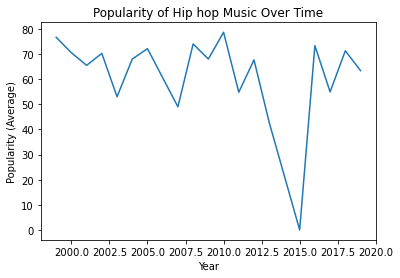

In [30]:
# Set up the search query for your genre of interest
genre = "hip hop"

# Filter the dataframe to include only the rows with the desired genre
df_genre = df[df["genre"] == genre]

# Group the dataframe by year and calculate the average popularity for each year
df_popularity = df_genre.groupby("year")["popularity"].mean().reset_index()

# Create a line graph of popularity over time
plt.plot(df_popularity["year"], df_popularity["popularity"])
plt.title(f"Popularity of {genre.capitalize()} Music Over Time")
plt.xlabel("Year")
plt.ylabel("Popularity (Average)")
plt.show()

## Popularity Over Time (Better trendline)

In [18]:
genre = "R&B" #change to the genre you want 

# Filter the dataframe to include only the rows with the desired genre
df_genre = df[df["genre"] == genre]

# Group the dataframe by year and calculate the average popularity for each year
df_popularity = df_genre.groupby("year")["popularity"].mean().reset_index()

# Create a line graph of popularity over time using plotly.express
fig = px.line(df_popularity, x="year", y="popularity", color_discrete_sequence = ["orange"], markers = True, title=f"<b>Popularity of {genre.capitalize()} Music Over Time")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Popularity (Average)")
fig.show()

## Genre Popularity (Barchart) 

In [15]:
genre_popularity = df.groupby('genre')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False).head(25)
genre_popularity.head(3)

,genre,popularity
42,"pop, rock, Folk/Acoustic",79.0
1,"Folk/Acoustic, pop",78.0
57,"rock, pop, metal, Dance/Electronic",76.0


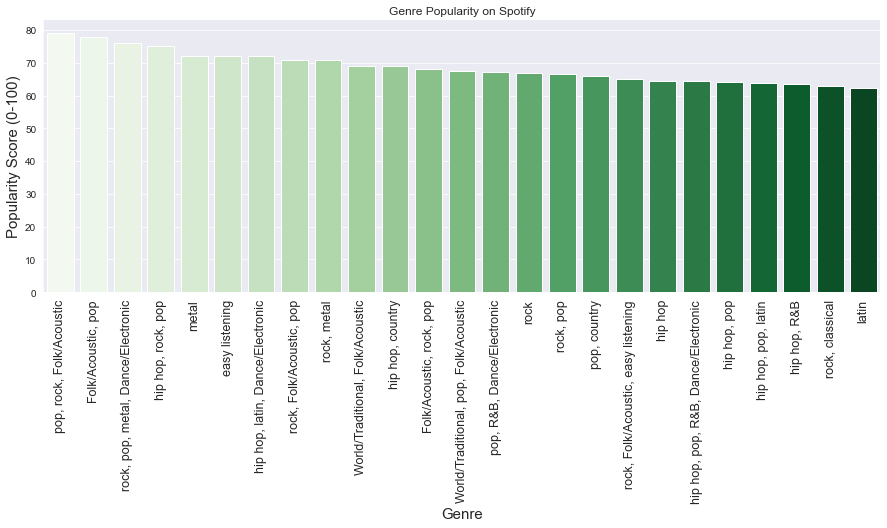

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
my_palette = sns.color_palette('Greens', n_colors=25)
sns.barplot(x='genre', y='popularity', data = genre_popularity, palette = my_palette)
sns.despine()
plt.title('Genre Popularity on Spotify')
plt.xlabel('Genre', size = 15)
plt.ylabel('Popularity Score (0-100)', size = 15)
plt.xticks(rotation=90, size = 12.5)
plt.show()